In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 데이터 경로 설정
rootPath = '/content/drive/MyDrive/Colab Notebooks'


train_dir = os.path.join(rootPath, 'train') # /tmp/cats_and_dogs_filtered/train
validation_dir = os.path.join(rootPath, 'validation')  # /tmp/cats_and_dogs_filtered/validation

# 스케일링 + 데이터 증식 속성 설정
trainImageGenerator = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip = True,
                                         vertical_flip = True,
                                         shear_range = 0.5,
                                         brightness_range = [0.5, 1.5],
                                         zoom_range = 0.2,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         rotation_range = 30,
                                         fill_mode = 'nearest')

# 스케일링 설정
testImageGenerator =  ImageDataGenerator(rescale=1./255)


trainGen = trainImageGenerator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    class_mode = 'categorical'
)
# X_train, X_val, y_train, y_val = train_test_split(
#     trainGen[0][0], trainGen[0][1], test_size=0.2, random_state=42)

# testGen = testImageGenerator.flow_from_directory(
#     validation_dir,
#     target_size=(64, 64),
#     class_mode = 'categorical'
# )

Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
print(trainGen.class_indices)
print(testGen.class_indices)

{'정상': 0, '증강': 1, '질병': 2}
{'정상': 0, '증강': 1, '질병': 2}


KeyboardInterrupt: ignored

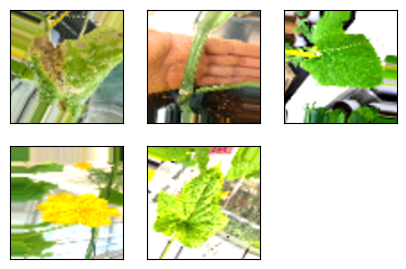

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

for i in range(9):
  data = next(trainGen)
  arr = data[0][0]
  plt.subplot(3, 3, i+1)
  plt.xticks([]) # 눈금 지우기
  plt.yticks([])
  img = array_to_img(arr).resize((128, 128))
  plt.imshow(img)

plt.show()

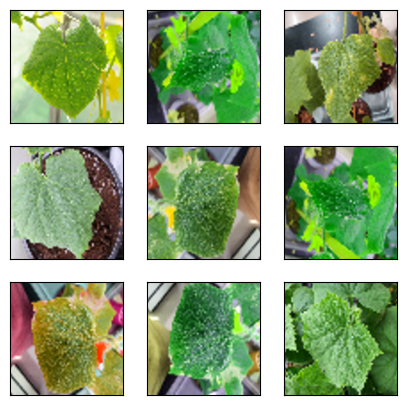

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

for i in range(9):
  data = next(testGen)
  arr = data[0][0]
  plt.subplot(3, 3, i+1)
  plt.xticks([]) # 눈금 지우기
  plt.yticks([])
  img = array_to_img(arr).resize((128, 128))
  plt.imshow(img)

plt.show()

In [ ]:
label_index = trainGen.class_indices
label_index.items()

dict_items([('정상', 0), ('증강', 1), ('질병', 2)])

In [ ]:
label_valid= testGen.class_indices
label_valid.items()

dict_items([('정상', 0), ('증강', 1), ('질병', 2)])

사진 : ['증강']
사진 : 1


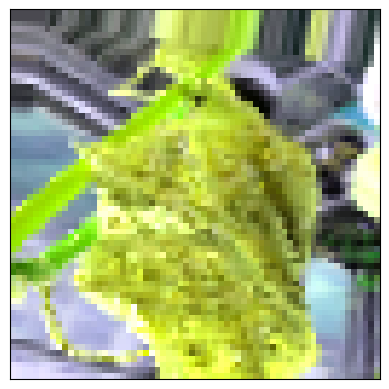

사진 : ['질병']
사진 : 2


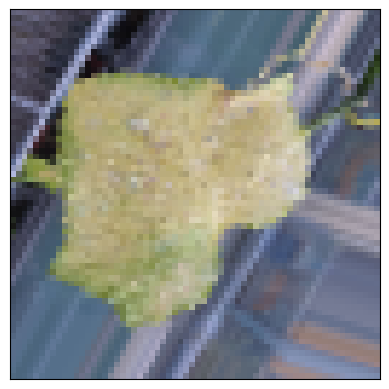

사진 : ['질병']
사진 : 2


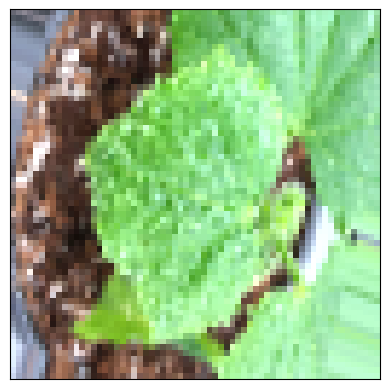

In [ ]:
import numpy as np
label_index = trainGen.class_indices

# {'정상': 0, '증강': 1, '질병': 2}
x, y = trainGen.next()

for i in range(0, 3):
  image = x[i]
  label = y[i].astype('int')
  label = np.argmax(label, axis=-1)

  plt.xticks([]) # 눈금 지우기
  plt.yticks([])
  print('사진 : {}'.format([k for k, v in label_index.items() if v == label]))
  print('사진 : {}'.format(label))
  plt.imshow(image)
  plt.show()

간단한 CNN 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

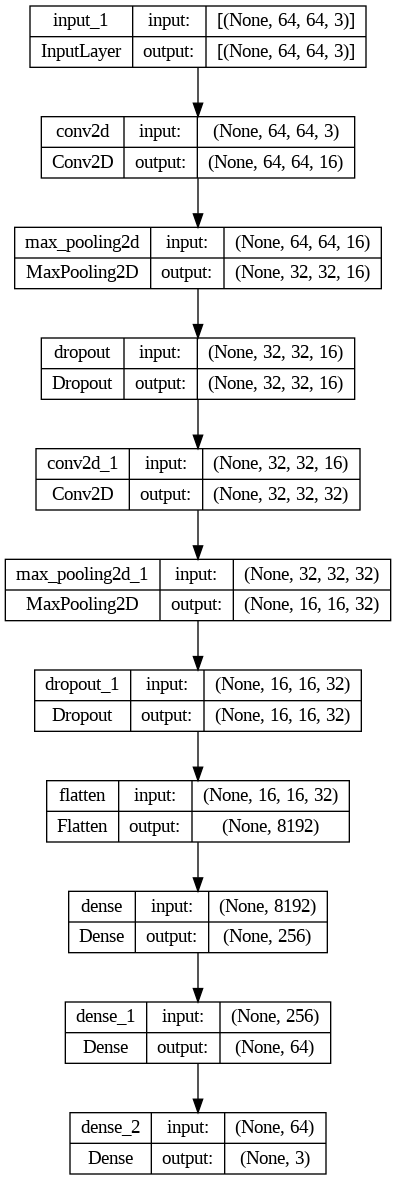

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
import tensorflow as tf

history = model.fit_generator(trainGen, epochs=64, validation_data=testGen)
model.save('cu_test_val.h5')

<ipython-input-5-1f10bc800951>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(trainGen, epochs=64, validation_data=testGen)


Epoch 1/64
19/19 [==============================] - 635s 35s/step - loss: 1.2282 - acc: 0.3517 - val_loss: 1.0674 - val_acc: 0.3600
Epoch 2/64
19/19 [==============================] - 227s 12s/step - loss: 0.8594 - acc: 0.6750 - val_loss: 0.8151 - val_acc: 0.6533
Epoch 3/64
19/19 [==============================] - 227s 12s/step - loss: 0.6011 - acc: 0.7500 - val_loss: 0.7637 - val_acc: 0.6200
Epoch 4/64
19/19 [==============================] - 218s 12s/step - loss: 0.5271 - acc: 0.7933 - val_loss: 0.7180 - val_acc: 0.6567
Epoch 5/64
19/19 [==============================] - 231s 12s/step - loss: 0.5742 - acc: 0.7600 - val_loss: 0.6863 - val_acc: 0.6600
Epoch 6/64
19/19 [==============================] - 228s 12s/step - loss: 0.5683 - acc: 0.7767 - val_loss: 0.7138 - val_acc: 0.6800
Epoch 7/64
19/19 [==============================] - 215s 12s/step - loss: 0.5556 - acc: 0.7833 - val_loss: 0.6715 - val_acc: 0.6567
Epoch 8/64
19/19 [==============================] - 229s 12s/step - loss: 0.

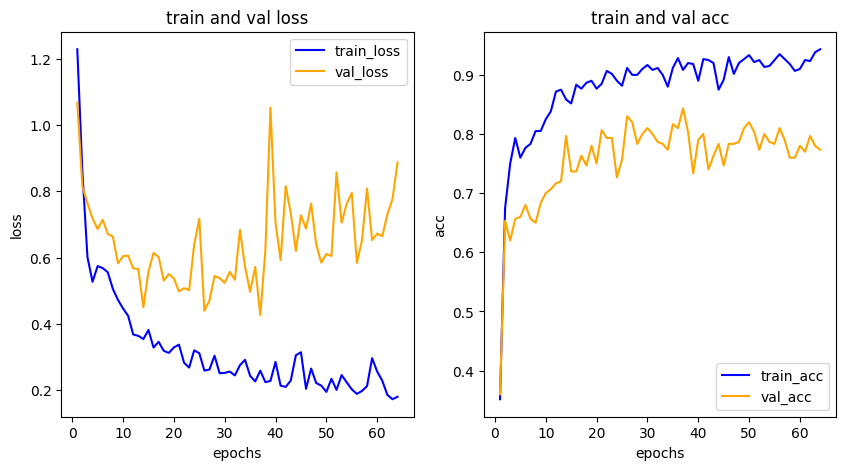

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')

ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

label_index = ['정상', '증강', '질병']

x, y = trainGen.next()
for i in range(0,10):
  image = x[i]
  label = y[i].astype('int')
  label = np.argmax(label, axis=-1)

  y_prob = model.predict(image.reshape(1, 64, 64, 3))
  y_prob_class = (model.predict(image.reshape(1, 64, 64, 3)) > 0.5 ).astype('int')[0][0]
  print('정답: {}'.format(label_index[label]), ' label :', label)
  print('예측: {}'.format(label_index[y_prob_class]), ' predicted value :', y_prob)
  plt.imshow(image)
  plt.show()


In [ ]:
from tensorflow import keras

kmodel = keras.models.load_model('cu_test_val.h5')
kmodel.evaluate_generator(testGen)

<ipython-input-8-b30118eba23f>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  kmodel.evaluate_generator(testGen)


[0.8869763016700745, 0.7733333110809326]

In [ ]:
import tensorflow as tf
model.save('cu_test.h5')

NameError: ignored

In [ ]:
new_model = tf.keras.models.load_model('cu_test.h5')
x, y = trainGen.next()

for i in range(0,10):
  image = x[i]
  label = y[i].astype('int')
  label = np.argmax(label, axis=-1)

  new_model.predict(image.reshape(1, 64, 64, 3))
  print('정답: {}'.format(label_index[label]), ' label :', label)
  print('예측: {}'.format(label_index[y_prob_class]), ' predicted value :', y_prob)
  plt.imshow(image)
  plt.show()

예측 및 확인

Found 300 images belonging to 3 classes.
['정상', '증강', '질병']
1/1 [==============================] - 0s 432ms/step
2
2
예측: 질병  predicted value : 2
정답: 질병  label : 2


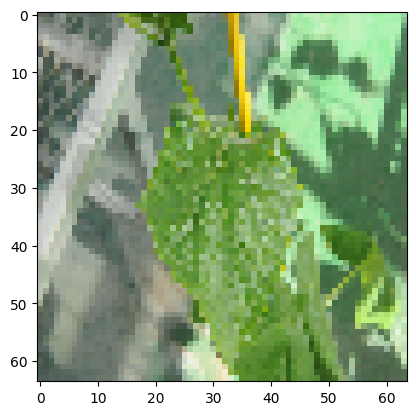

1/1 [==============================] - 0s 29ms/step
1
1
예측: 증강  predicted value : 1
정답: 증강  label : 1


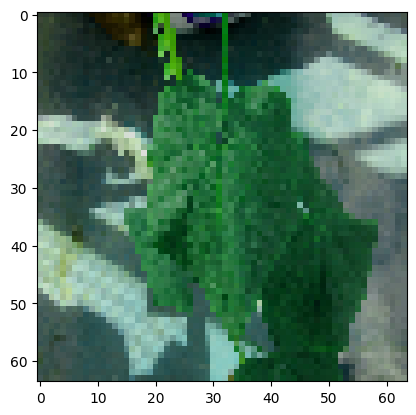

1/1 [==============================] - 0s 33ms/step
0
0
예측: 정상  predicted value : 0
정답: 정상  label : 0


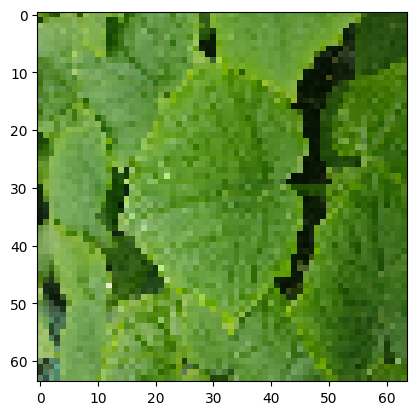

1/1 [==============================] - 0s 31ms/step
2
1
예측: 질병  predicted value : 2
정답: 증강  label : 1


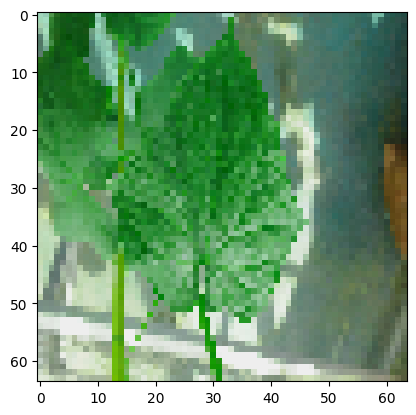

1/1 [==============================] - 0s 34ms/step
0
0
예측: 정상  predicted value : 0
정답: 정상  label : 0


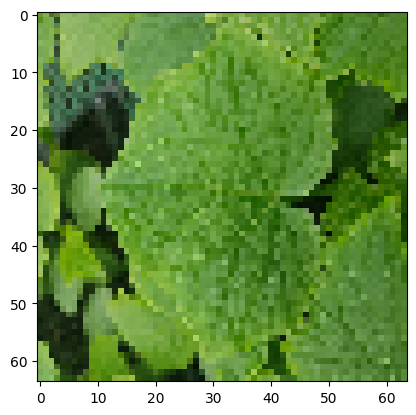

1/1 [==============================] - 0s 29ms/step
2
2
예측: 질병  predicted value : 2
정답: 질병  label : 2


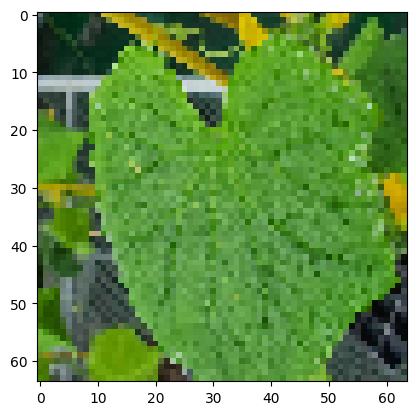

1/1 [==============================] - 0s 29ms/step
0
0
예측: 정상  predicted value : 0
정답: 정상  label : 0


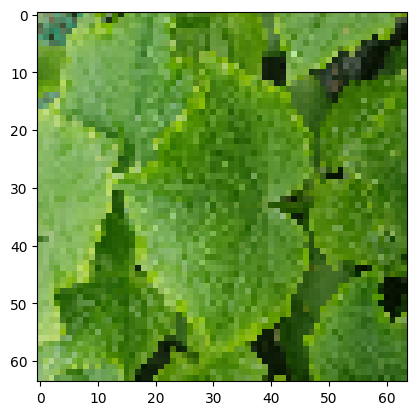

1/1 [==============================] - 0s 28ms/step
1
1
예측: 증강  predicted value : 1
정답: 증강  label : 1


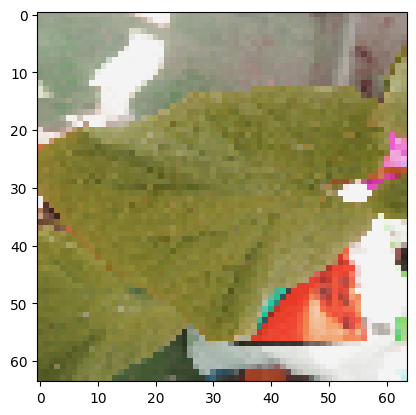

1/1 [==============================] - 0s 28ms/step
1
1
예측: 증강  predicted value : 1
정답: 증강  label : 1


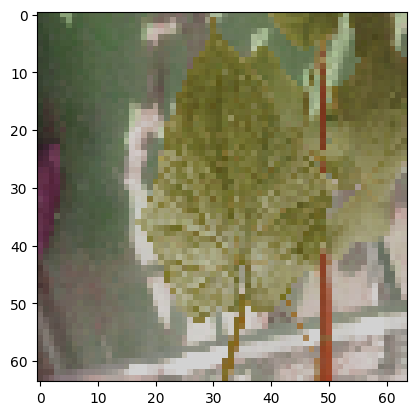

1/1 [==============================] - 0s 30ms/step
0
0
예측: 정상  predicted value : 0
정답: 정상  label : 0


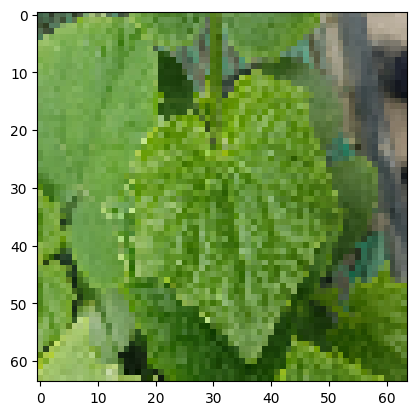

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
# rootPath = './train'
rootPath = '/content/drive/MyDrive/Colab Notebooks/validation'

# 스케일링 설정
testImageGenerator =  ImageDataGenerator(rescale=1./255)

testGen = testImageGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(64, 64),
    class_mode = 'categorical'
)

label_index = ['정상', '증강', '질병']
print(label_index)
new_model = tf.keras.models.load_model('cu_test_no_val.h5')

x, y = testGen.next()

for i in range(0,10):
  image = x[i]
  label = y[i].astype('int')
  label = np.argmax(label, axis=-1)
#  label = y[i].astype('int')

  y_prob = new_model.predict(image.reshape(1, 64, 64, 3))
  y_prob = np.argmax(y_prob, axis=-1)[0]
  print(y_prob)
  print(label)
  print('예측: {}'.format(label_index[y_prob]), ' predicted value :', y_prob)
  print('정답: {}'.format(label_index[label]), ' label :', label)
  plt.imshow(image)
  plt.show()

GUI 구현


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import ImageTk, Image
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the pre-trained Keras model
model = keras.models.load_model('cu_test_val.h5')

# Define the image size that the model expects
img_size = (224, 224)

# Define the class labels
class_labels = ['class_1', 'class_2', 'class_3']

# Define a function to preprocess the image for the model
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Define a function to handle the "classify image" button click
def classify_image():
    # Get the path of the selected image
    image_path = filedialog.askopenfilename()
    
    # Load the image
    img = Image.open(image_path)
    
    # Resize the image to (64, 64)
    img = img.resize((64, 64))
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Scale the pixel values to between 0 and 1
    img_array = img_array / 255.0
    
    # Reshape the image array to have a batch dimension of 1
    img_array = np.expand_dims(img_array, axis=0)
    
    # Use the loaded model to make a prediction
    predictions = model.predict(img_array)
    
    # Get the index of the predicted class
    predicted_index = np.argmax(predictions)
    
    # Get the label of the predicted class
    predicted_label = class_names[predicted_index]
    
    # Show the predicted label in a message box
    messagebox.showinfo("Classification Result", f"The image is classified as {predicted_label}.")


# Create the GUI
root = tk.Tk()
root.title('Image Classifier')

# Create a label for the image
image_label = tk.Label(root)
image_label.pack()

# Create a button to classify the image
classify_button = tk.Button(root, text='Classify Image', command=classify_image)
classify_button.pack()

# Start the main event loop
root.mainloop()